Grayscale image : 
[[137 137 137 ... 151 151 151]
 [137 137 137 ... 150 150 151]
 [137 137 137 ... 149 149 148]
 ...
 [ 70  70  70 ...  75  75  72]
 [ 71  70  70 ...  73  73  73]
 [ 71  70  70 ...  72  72  75]]
Grayscale image1 : 
[[137 137 137 ... 152 152 151]
 [137 137 137 ... 151 151 151]
 [137 137 137 ... 149 150 148]
 ...
 [ 71  71  71 ...  75  75  72]
 [ 72  71  71 ...  73  73  73]
 [ 72  71  71 ...  72  72  75]]
大津算法阈值 : 98.0

三角形算法阈值 : 94.0

自定义全局阈值 : 95.0

Bi image : 
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


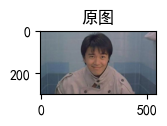

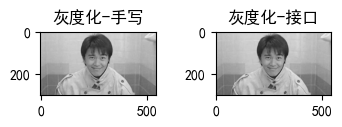

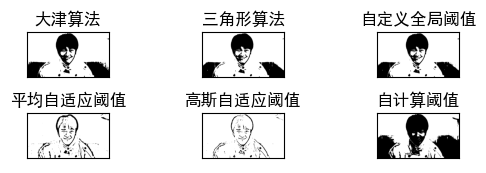

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
#from skimage.color import rgb2gray

# img = cv2.imread("1.jpg")
plt.figure(1)
plt.subplot(531)
img = plt.imread("1.jpg")
plt.title('原图')
plt.imshow(img)
#cv2.imshow(img)
plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文乱码

#灰度化-手写
plt.figure(2)
img = plt.imread("1.jpg")
h,w = img.shape[:2]
gray_imag = np.zeros([h,w], img.dtype)
for i in range(h):
    for j in range(w):
        m = img[i,j]
        gray_imag[i, j] = int(0.11 * m[0] + 0.59 * m[1] + 0.3 * m[2])

print("Grayscale image : \n%s"%gray_imag)
plt.subplot(534)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None) # 调整子图间距
plt.title('灰度化-手写')
plt.imshow(gray_imag, 'gray')
#cv2.imshow("Grayscale image",gray_imag)
#cv2.waitKey() # 保持窗口的显示，不然界面会卡死，不出图。
#cv2.destroyAllWindows()

# 灰度化-接口
#gray_imag1 = rgb2gray(img)

gray_imag1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print("Grayscale image1 : \n%s"%gray_imag1)
plt.subplot(535)
plt.title('灰度化-接口')
plt.imshow(gray_imag1, cmap='gray')
#cv2.imshow("Grayscale image1",gray_imag1)
#cv2.waitKey() 
# cv2.destroyAllWindows()
plt.figure(3)

# 二值化-全局阈值  
# cv2.THRESH_BINARY : 超过阈值的为0，低于阈值的为最大值
# cv2.THRESH_BINARY_INV ： 超过阈值的为最大值，低于阈值的为0
ret1, binary1 = cv2.threshold(gray_imag1, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)# 大津算法
ret2, binary2 = cv2.threshold(gray_imag1, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_TRIANGLE)#三角形算法
ret3, binary3 = cv2.threshold(gray_imag1, 95, 255, cv2.THRESH_BINARY)#自定义全局阈值

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.8) # 调整子图间距

print("大津算法阈值 : %s\n"%ret1)
plt.subplot(537)
plt.xticks([]) #去除纵横坐标
plt.yticks([])
plt.title('大津算法')
plt.imshow(binary1, cmap='gray')

print("三角形算法阈值 : %s\n"%ret2)
plt.subplot(538)
plt.xticks([]) #去除纵横坐标
plt.yticks([])
plt.title('三角形算法')
plt.imshow(binary2, cmap='gray')

print("自定义全局阈值 : %s\n"%ret3)
plt.subplot(539)
plt.xticks([]) #去除纵横坐标
plt.yticks([])
plt.title('自定义全局阈值')
plt.imshow(binary3, cmap='gray')

# 二值化-局部阈值
binary4 = cv2.adaptiveThreshold(gray_imag1, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 25, 10)#平均自适应阈值
binary5 = cv2.adaptiveThreshold(gray_imag1, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 25, 10)#高斯自适应阈值

#print("平均自适应阈值 : %s\n"%ret)
#print(binary)
plt.subplot(5, 3, 10)
plt.xticks([]) #去除纵横坐标
plt.yticks([])
plt.title('平均自适应阈值')
plt.imshow(binary4, cmap='gray')

#print("高斯自适应阈值 : %s\n"%ret)
plt.subplot(5, 3, 11)
plt.xticks([]) #去除纵横坐标
plt.yticks([])
plt.title('高斯自适应阈值')
plt.imshow(binary5, cmap='gray')

# 二值化-自计算阈值
h, w = gray_imag1.shape[:2]
m = np.reshape(gray_imag1, [1, h*w]) #将图像转为1行h*w列
mean = m.sum() / (h*w)  #计算图像的均值，用均值作为阈值，来分割图像
#ret, binary = cv2.threshold(gray, mean, 255, cv2.THRESH_BINARY)

binary6 = np.where(gray_imag1 >= mean, 255, 0)
#cv2.imshow("Bi image",bi_imag)
print("Bi image : \n%s"%binary6)
plt.subplot(5, 3, 12)
plt.xticks([]) #去除纵横坐标
plt.yticks([])
plt.title('自计算阈值')
plt.imshow(binary6, cmap='gray')